In [1]:
#CNN is a type of artificial Neural Network which is widely used for object/image recognition and classification.
#Deep Learning recognizes objects in an image by using CNN.

In [1]:
# Import the necessary packages
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# a. Loading and preprocessing the image data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
input_shape = (28,28,1)  # images are greyscale thats why input chaneel is 1

In [3]:
# making sure that the values are float so that we can get the decimal points after devision
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

# print('Data type of x_train:',x_train.dtype)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# print('Data type of x_train after converting to float:',x_train.dtype)


In [4]:
# Normalizing the RGB codes by deviding it to the max RGB value

x_train = x_train/255
x_test = x_test/255

print('shape of training :',x_train.shape)

shape of training : (60000, 28, 28, 1)


In [5]:
print('shape of testing :',x_test.shape)

shape of testing : (10000, 28, 28, 1)


In [7]:
# b. Defining the model’s architecture

model = Sequential()  # used sequential as we have to add layers one after another
model.add(Conv2D(28, kernel_size=(3,3),input_shape=input_shape))
# kernel size - it is kernel size or filter size, it is an size of each convolutional layer, you can change size also
# input shape is input size which we have declared above

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(200,activation='relu'))  # Hidden Layer
model.add(Dropout(0.3))                  # Will drop some random neurons from hidden layer, 30%neurons will be removed
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 28)     │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 28)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4732)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 200)            │       946,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 948,890 (3.62 MB)

 Trainable params: 948,890 (3.62 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# c. Training the model

model.compile(optimizer = 'adam',
loss = 'sparse_categorical_crossentropy',
metrics = ['accuracy'])

model.fit(x_train,y_train,epochs=2)

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 15ms/step - accuracy: 0.8952 - loss: 0.3412
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9731 - loss: 0.0910


In [9]:
# d. Estimating the model’s performance

test_loss, test_acc = model.evaluate(x_test, y_test)
print('loss=%.3f' %test_loss)
print('Accuracy=%.3f' %test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9761 - loss: 0.0732
loss=0.059
Accuracy=0.981


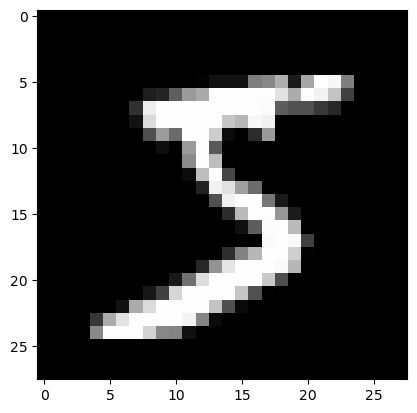

In [14]:
# Showing image at position[] from dataset

image = x_train[0]
plt.imshow(np.squeeze(image),cmap='gray')  # it will remove arrays of single diamensional
plt.show()

In [15]:
# predicting the class of image

image = image.reshape(1,image.shape[0],image.shape[1],image.shape[2])
predict_model = model.predict([image])
print('predicted class: {}'.format(np.argmax(predict_model)))  # it displays max value

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
predicted class: 5
